#**Libraries**

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.svm import SVC
from skimage.feature import local_binary_pattern, hog
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.decomposition import PCA




#**Gun ( Pre processing)**
*Creating Features array*

Run once for creating training arrays, then for Testing arrays.


In [ ]:
def extract_lbp_features(image, radius=1, n_points=8, method='uniform'):
    lbp = local_binary_pattern(image, n_points, radius, method=method)
    n_bins = int(lbp.max() + 1)
    lbp_hist, _ = np.histogram(lbp, bins=n_bins, range=(0, n_bins), density=True)
    return lbp, lbp_hist

#For testing data
folder_path = r"/content/drive/MyDrive/students_data/test/gun"
mask_folder_path = r"/content/drive/MyDrive/students_data/test/annotations/gun"


#For training data
#folder_path = r"/content/drive/MyDrive/students_data/train/gun"
#mask_folder_path = r"/content/drive/MyDrive/students_data/train/annotations/gun"
images = os.listdir(folder_path)

features_list = []

for image_name in images:
    image_path = os.path.join(folder_path, image_name)
    image = cv2.imread(image_path)

    image = cv2.resize(image, (512, 512))

    mask_path = os.path.join(mask_folder_path, image_name)
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

     # Check if mask was loaded successfully
    if mask is None:
        print(f"Error loading mask for image: {image_name}. Check if the file exists and is not corrupted.")
        continue  # Skip to the next image if mask loading failed

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    mask = cv2.resize(mask, (gray.shape[1], gray.shape[0]))
    masked_image = cv2.bitwise_and(gray, gray, mask=mask)


    gray = masked_image
    radius = 1
    n_points = 8 * radius

    lbp, lbp_features = extract_lbp_features(gray, radius, n_points, method='uniform')

    hog_features = hog(gray, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), block_norm='L2-Hys')

    features = np.concatenate((lbp_features, hog_features))

    features_list.append(features)

features_array = np.array(features_list, dtype=object)

save_path = r"/content/drive/MyDrive/students_data/TEST1_features_array_gun.npy"
np.save(save_path, features_array)

print("Features Array Shape:", features_array.shape)

Features Array Shape: (93, 142894)


#**Knives (pre processing)**
*Creating features Array*

Run once for creating training arrays, then for Testing arrays.



In [ ]:
def extract_lbp_features(image, radius=1, n_points=8, method='uniform'):
    lbp = local_binary_pattern(image, n_points, radius, method=method)
    n_bins = int(lbp.max() + 1)
    lbp_hist, _ = np.histogram(lbp, bins=n_bins, range=(0, n_bins), density=True)
    return lbp, lbp_hist
#for testing
folder_path = r"/content/drive/MyDrive/students_data/test/knife"
mask_folder_path = r"/content/drive/MyDrive/students_data/test/annotations/knife"


#for trraining
#folder_path = r"/content/drive/MyDrive/students_data/train/knife"
#mask_folder_path = r"/content/drive/MyDrive/students_data/train/annotations/knife"
images = os.listdir(folder_path)

features_list = []

for image_name in images:
    image_path = os.path.join(folder_path, image_name)
    image = cv2.imread(image_path)

    image = cv2.resize(image, (512, 512))

    mask_path = os.path.join(mask_folder_path, image_name)
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    mask = cv2.resize(mask, (gray.shape[1], gray.shape[0]))
    masked_image = cv2.bitwise_and(gray, gray, mask=mask)


    gray = masked_image
    radius = 1
    n_points = 8 * radius

    lbp, lbp_features = extract_lbp_features(gray, radius, n_points, method='uniform')

    hog_features = hog(gray, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), block_norm='L2-Hys')

    features = np.concatenate((lbp_features, hog_features))

    features_list.append(features)

features_array = np.array(features_list, dtype=object)

save_path = r"/content/drive/MyDrive/students_data/TEST2_features_array_knife.npy"
np.save(save_path, features_array)

print("Features Array Shape:", features_array.shape)

Features Array Shape: (30, 142894)


#**Safe (Pre processing)**
*Creating feature array*

Run once for creating training arrays, then for Testing arrays.



In [ ]:


def extract_lbp_features(image, radius=1, n_points=8, method='uniform'):
    lbp = local_binary_pattern(image, n_points, radius, method=method)
    n_bins = int(lbp.max() + 1)
    lbp_hist, _ = np.histogram(lbp, bins=n_bins, range=(0, n_bins), density=True)
    return lbp, lbp_hist

#for testing
folder_path = r"/content/drive/MyDrive/students_data/test/safe"


#for training
#folder_path = r"/content/drive/MyDrive/students_data/train/safe"
images = os.listdir(folder_path)

features_list = []

for image_name in images:
    image_path = os.path.join(folder_path, image_name)
    image = cv2.imread(image_path)

    image = cv2.resize(image, (512, 512))

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    radius = 1
    n_points = 8 * radius

    lbp, lbp_features = extract_lbp_features(gray, radius, n_points, method='uniform')

    hog_features = hog(gray, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), block_norm='L2-Hys')

    features = np.concatenate((lbp_features, hog_features))

    features_list.append(features)

features_array = np.array(features_list, dtype=object)

save_path = r"/content/drive/MyDrive/students_data/TEST3_features_array_safe.npy"
np.save(save_path, features_array)

print("Features Array Shape:", features_array.shape)

Features Array Shape: (55, 142894)


#**Loading Training & Testing data for Model**

In [ ]:
# Load training data
X_train_gun = np.load('/content/drive/MyDrive/students_data/features_array_gun.npy', allow_pickle=True)
X_train_knife = np.load('/content/drive/MyDrive/students_data/features_array_knife.npy', allow_pickle=True)
X_train_safe = np.load('/content/drive/MyDrive/students_data/features_array_safe.npy', allow_pickle=True)

# Load testing data
X_test_gun = np.load('/content/drive/MyDrive/students_data/TEST1_features_array_gun.npy', allow_pickle=True)
X_test_knife = np.load('/content/drive/MyDrive/students_data/TEST2_features_array_knife.npy', allow_pickle=True)
X_test_safe = np.load('/content/drive/MyDrive/students_data/TEST3_features_array_safe.npy', allow_pickle=True)


#**Creating Labels**

#**Combine features and labels**

In [ ]:
# Create labels
y_train_gun = np.full(X_train_gun.shape[0], 0)  # Label '0' for gun
y_train_knife = np.full(X_train_knife.shape[0], 1)  # Label '1' for knife
y_train_safe = np.full(X_train_safe.shape[0], 2)  # Label '2' for safe

y_test_gun = np.full(X_test_gun.shape[0], 0)  # Label '0' for gun
y_test_knife = np.full(X_test_knife.shape[0], 1)  # Label '1' for knife
y_test_safe = np.full(X_test_safe.shape[0], 2)  # Label '2' for safe

# Combine training data and labels
X_train = np.concatenate((X_train_gun, X_train_knife, X_train_safe))
y_train = np.concatenate((y_train_gun, y_train_knife, y_train_safe))

# Combine testing data and labels
X_test = np.concatenate((X_test_gun, X_test_knife, X_test_safe))
y_test = np.concatenate((y_test_gun, y_test_knife, y_test_safe))


#Train SVM Model

In [ ]:
from sklearn.decomposition import PCA

# Define the pipeline with PCA for dimensionality reduction
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize the features
    ('pca', PCA(n_components=50)),  # Reduce to 50 principal components
    ('svc', SVC(probability=True))  # SVM classifier with probability estimates
])

# Define a smaller parameter grid for GridSearch
param_grid = {
    'svc__C': [0.1, 1, 10],
    'svc__kernel': ['linear', 'rbf'],
    'svc__gamma': ['scale']
}

# Perform GridSearchCV to find the best parameters
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='accuracy', n_jobs=1, verbose=1)
grid_search.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Print best parameters
print("Best parameters found: ", grid_search.best_params_)


Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters found:  {'svc__C': 1, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}


#**Save The model**

In [ ]:
import joblib

# Define the path where you want to save the model
save_model_path = '/content/drive/MyDrive/students_data/svm_model.pkl'

# Save the model to disk
joblib.dump(best_model, save_model_path)

print(f"Trained model saved to {save_model_path}")


Trained model saved to /content/drive/MyDrive/students_data/svm_model.pkl


#Evaluate SVM Model

Overall Accuracy: 0.9044943820224719
Classification Report:
              precision    recall  f1-score   support

         Gun       0.85      1.00      0.92        93
       Knife       1.00      0.47      0.64        30
        Safe       1.00      0.98      0.99        55

    accuracy                           0.90       178
   macro avg       0.95      0.82      0.85       178
weighted avg       0.92      0.90      0.89       178

F1 Scores for each class: [0.91625616 0.63636364 0.99082569]


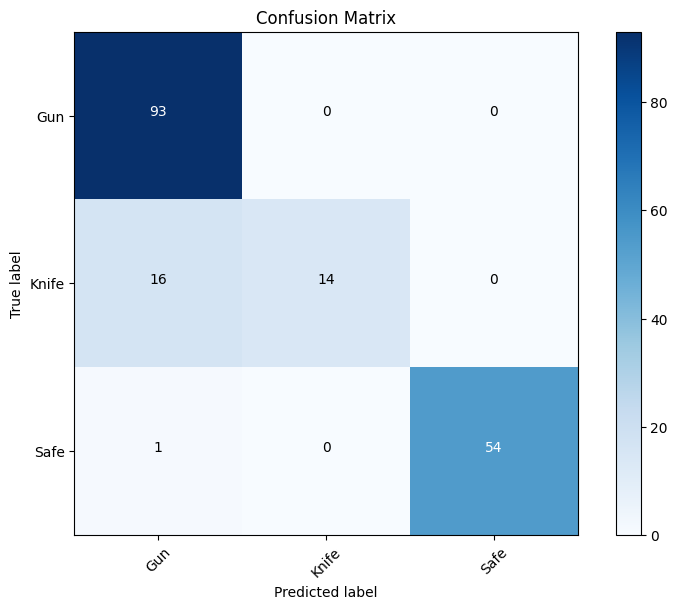

In [ ]:
import seaborn as sns
import itertools

# Predict on the test set
y_pred = best_model.predict(X_test)

# Calculate overall accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate classification report
classification_rep = classification_report(y_test, y_pred, target_names=['Gun', 'Knife', 'Safe'])

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate F1 score for each class
f1_scores = f1_score(y_test, y_pred, average=None)

# Plot confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Plot confusion matrix
plot_confusion_matrix(conf_matrix, classes=['Gun', 'Knife', 'Safe'])

# Print evaluation metrics
print(f"Overall Accuracy: {accuracy}")
print(f"Classification Report:\n{classification_rep}")
print(f"F1 Scores for each class: {f1_scores}")

#Libraies

In [7]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, concatenate, Input, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.transform import resize
import os
from skimage.io import imread
from skimage.transform import resize
from tensorflow.keras.utils import to_categorical

#Loading dataset

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
import os
import numpy as np
from skimage.io import imread
from skimage.transform import resize

def load_image(img_path, img_size):
    img = imread(img_path)
    img = resize(img, img_size, mode='constant', preserve_range=True)
    return img

def load_mask(mask_path, mask_size):
    mask = imread(mask_path, as_gray=True)
    mask = resize(mask, mask_size, mode='constant', preserve_range=True)
    mask = np.expand_dims(mask, axis=-1)  # Add channel dimension
    return mask

def load_dataset(image_folder_gun, image_folder_knife, image_folder_safe=None, mask_folder_gun=None, mask_folder_knife=None, img_size=(128, 128, 3), mask_size=(128, 128, 1)):
    X_gun, y_gun = load_data_category(image_folder_gun, mask_folder_gun, img_size, mask_size)
    X_knife, y_knife = load_data_category(image_folder_knife, mask_folder_knife, img_size, mask_size)

    X_safe = None
    y_safe = None
    if image_folder_safe:
        X_safe, y_safe = load_data_category(image_folder_safe, None, img_size, mask_size)

    # Combine the data from all categories
    X = np.concatenate((X_gun, X_knife), axis=0)
    y = np.concatenate((y_gun, y_knife), axis=0)
    if X_safe is not None:
        X = np.concatenate((X, X_safe), axis=0)
        y = np.concatenate((y, y_safe), axis=0)

    print(f"Loaded images shape: {X.shape}")
    print(f"Loaded masks shape: {y.shape}")

    return X, y

def load_data_category(image_folder, mask_folder, img_size, mask_size):
    image_paths = sorted([os.path.join(image_folder, f) for f in os.listdir(image_folder) if f.endswith('.jpg') or f.endswith('.png')])

    X = []
    y = []

    for img_path in image_paths:
        img = load_image(img_path, img_size)
        X.append(img)

        if mask_folder:
            # Find corresponding mask path (if exists)
            mask_name = os.path.splitext(os.path.basename(img_path))[0] + '.png'
            mask_path = os.path.join(mask_folder, mask_name)
            if os.path.exists(mask_path):
                mask = load_mask(mask_path, mask_size)
            else:
                mask = np.zeros(mask_size)
                mask = np.expand_dims(mask, axis=-1)
        else:
            # No masks provided, use a dummy mask
            mask = np.zeros(mask_size)
            mask = np.expand_dims(mask, axis=-1)

        y.append(mask)

    # Convert lists to numpy arrays
    X = np.array(X)
    y = np.array(y)

    # Normalize the images and masks
    X = X / 255.0
    y = y / 255.0

    return X, y

# Example paths
train_image_folder_gun = '/content/drive/MyDrive/students_data/train/gun'
train_mask_folder_gun = '/content/drive/MyDrive/students_data/train/annotations/gun'
train_image_folder_knife = '/content/drive/MyDrive/students_data/train/knife'
train_mask_folder_knife = '/content/drive/MyDrive/students_data/train/annotations/knife'
train_image_folder_safe = '/content/drive/MyDrive/students_data/train/safe'

X, y = load_dataset(train_image_folder_gun, train_image_folder_knife, train_image_folder_safe, train_mask_folder_gun, train_mask_folder_knife)

print(f"Final loaded images shape: {X.shape}")
print(f"Final loaded masks shape: {y.shape}")


Loaded images shape: (1542, 128, 128, 3)
Loaded masks shape: (1542, 128, 128, 1, 1)
Final loaded images shape: (1542, 128, 128, 3)
Final loaded masks shape: (1542, 128, 128, 1, 1)


#Build Model

In [17]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, BatchNormalization, Activation, Input, concatenate, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model

def unet_model(input_size=(128, 128, 3)):
    inputs = Input(input_size)

    # Encoder
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = BatchNormalization()(c1)
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    c1 = BatchNormalization()(c1)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = BatchNormalization()(c2)
    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    c2 = BatchNormalization()(c2)
    p2 = MaxPooling2D((2, 2))(c2)

    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = BatchNormalization()(c3)
    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(c3)
    c3 = BatchNormalization()(c3)
    p3 = MaxPooling2D((2, 2))(c3)

    c4 = Conv2D(512, (3, 3), activation='relu', padding='same')(p3)
    c4 = BatchNormalization()(c4)
    c4 = Conv2D(512, (3, 3), activation='relu', padding='same')(c4)
    c4 = BatchNormalization()(c4)
    p4 = MaxPooling2D((2, 2))(c4)

    c5 = Conv2D(1024, (3, 3), activation='relu', padding='same')(p4)
    c5 = BatchNormalization()(c5)
    c5 = Conv2D(1024, (3, 3), activation='relu', padding='same')(c5)
    c5 = BatchNormalization()(c5)

    # Decoder
    u6 = Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(512, (3, 3), activation='relu', padding='same')(u6)
    c6 = BatchNormalization()(c6)
    c6 = Conv2D(512, (3, 3), activation='relu', padding='same')(c6)
    c6 = BatchNormalization()(c6)

    u7 = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(256, (3, 3), activation='relu', padding='same')(u7)
    c7 = BatchNormalization()(c7)
    c7 = Conv2D(256, (3, 3), activation='relu', padding='same')(c7)
    c7 = BatchNormalization()(c7)

    u8 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(128, (3, 3), activation='relu', padding='same')(u8)
    c8 = BatchNormalization()(c8)
    c8 = Conv2D(128, (3, 3), activation='relu', padding='same')(c8)
    c8 = BatchNormalization()(c8)

    u9 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = concatenate([u9, c1])
    c9 = Conv2D(64, (3, 3), activation='relu', padding='same')(u9)
    c9 = BatchNormalization()(c9)
    c9 = Conv2D(64, (3, 3), activation='relu', padding='same')(c9)
    c9 = BatchNormalization()(c9)

    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c9)

    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model

model = unet_model(input_size=(128, 128, 3))

print(model.summary())


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv2d_19 (Conv2D)          (None, 128, 128, 64)         1792      ['input_2[0][0]']             
                                                                                                  
 batch_normalization_18 (Ba  (None, 128, 128, 64)         256       ['conv2d_19[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 conv2d_20 (Conv2D)          (None, 128, 128, 64)         36928     ['batch_normalization_18

#Train n Save

In [ ]:
history = model.fit(X, y, batch_size=8, epochs=5, verbose=1, validation_split=0.1)

# Save the trained model
model.save('/content/drive/MyDrive/students_data/unet_model.h5')


Epoch 1/5
 15/174 [=>............................] - ETA: 42:28 - loss: 0.7077 - accuracy: 0.5799

#Predicting on test image


In [ ]:
import matplotlib.pyplot as plt

def load_test_image(img_path, img_size=(128, 128, 3)):
    img = imread(img_path)
    img = resize(img, img_size, mode='constant', preserve_range=True)
    img = img / 255.0  # Normalize the image
    return img

# Load a test image
test_image_path = 'path_to_test_image.jpg'
test_image = load_test_image(test_image_path)
test_image = np.expand_dims(test_image, axis=0)  # Add batch dimension

# Predict the segmentation mask
predicted_mask = model.predict(test_image)
predicted_mask = (predicted_mask > 0.5).astype(np.uint8)  # Threshold to binary mask

# Display the results
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Test Image')
plt.imshow(imread(test_image_path))

plt.subplot(1, 2, 2)
plt.title('Predicted Mask')
plt.imshow(predicted_mask[0, :, :, 0], cmap='gray')

plt.show()
